In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df = pd.read_csv('academicos_historico_balanceado.csv')
df.head()

,chave,idade,corRaca,trancamentos,notaIngresso,escolaPublica,nota,falta,ultimoSemestre,quantidadeRematricula,...,estadoCivil_code,deficiencia_code,matutino,vespertino,noturno,tipoVaga_code,moraCampus,grande_area,tempo_2_grau_superior,evadido
0,899F5044-7AD1-4CCE-88B1-38A1C6B0A0C4,24.0,0,0,657.30,0,3.150130,20.597403,8.0,12,...,0,0,1,1,0,0,0,5,2,1
1,17A24172-777E-46D9-BFDF-D9465B1DCE4D,33.0,1,0,543.40,0,7.463425,2.849315,9.0,11,...,0,0,1,1,0,0,1,5,0,0
2,BCB43225-578A-48EC-99DA-E242A4DF0B64,24.0,0,2,575.66,0,3.061905,16.619048,1.0,4,...,0,0,1,1,0,0,1,5,2,1
3,DB643205-09FF-4E5A-8E24-0B8E4E7FF4C2,38.0,1,1,521.84,0,6.229167,13.555556,4.0,4,...,0,0,0,0,1,1,0,5,6,1
4,C4E050D5-0EAD-4686-8806-F703B41C8439,25.0,1,0,657.30,1,7.877632,2.552632,8.0,8,...,0,0,1,1,0,0,0,4,2,0


In [3]:
colunas = df.columns
lista_colunas = list(df.columns)
#len(lista_colunas)
lista_colunas

['chave',
 'idade',
 'corRaca',
 'trancamentos',
 'notaIngresso',
 'escolaPublica',
 'nota',
 'falta',
 'ultimoSemestre',
 'quantidadeRematricula',
 'numDisciplinaUltimo',
 'tempoUniversidade',
 'aprovados',
 'matriculado',
 'reprovado_falta',
 'reprovado_media',
 'sexo_code',
 'estadoCivil_code',
 'deficiencia_code',
 'matutino',
 'vespertino',
 'noturno',
 'tipoVaga_code',
 'moraCampus',
 'grande_area',
 'tempo_2_grau_superior',
 'evadido']

In [4]:
lista_colunas.remove('chave')
lista_colunas.remove('evadido')
#len(lista_colunas)
lista_colunas

['idade',
 'corRaca',
 'trancamentos',
 'notaIngresso',
 'escolaPublica',
 'nota',
 'falta',
 'ultimoSemestre',
 'quantidadeRematricula',
 'numDisciplinaUltimo',
 'tempoUniversidade',
 'aprovados',
 'matriculado',
 'reprovado_falta',
 'reprovado_media',
 'sexo_code',
 'estadoCivil_code',
 'deficiencia_code',
 'matutino',
 'vespertino',
 'noturno',
 'tipoVaga_code',
 'moraCampus',
 'grande_area',
 'tempo_2_grau_superior']

In [5]:
x = df[lista_colunas]
y = df['evadido']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=18)

In [7]:
from sklearn.neural_network import MLPClassifier

In [8]:


inicio = time.time()  # Tempo inicial

In [9]:
modelo = MLPClassifier(
    hidden_layer_sizes=(16, 8),  # 16 neurônios na primeira e 8 na segunda camada oculta
    activation='relu',
    solver='adam',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=500,
    shuffle=True,
    random_state=20,
    validation_fraction=0.2,
    verbose=True)

In [10]:
modelo.fit(X_train, y_train)

Iteration 1, loss = 0.71376597
Iteration 2, loss = 0.42089146
Iteration 3, loss = 0.35535846
Iteration 4, loss = 0.33305714
Iteration 5, loss = 0.32938871
Iteration 6, loss = 0.32067623
Iteration 7, loss = 0.32514613
Iteration 8, loss = 0.31310714
Iteration 9, loss = 0.31331700
Iteration 10, loss = 0.31578285
Iteration 11, loss = 0.31588516
Iteration 12, loss = 0.30985406
Iteration 13, loss = 0.30727409
Iteration 14, loss = 0.31429707
Iteration 15, loss = 0.30826640
Iteration 16, loss = 0.31322989
Iteration 17, loss = 0.31114088
Iteration 18, loss = 0.31023994
Iteration 19, loss = 0.31508633
Iteration 20, loss = 0.30799200
Iteration 21, loss = 0.30912271
Iteration 22, loss = 0.30885860
Iteration 23, loss = 0.31082481
Iteration 24, loss = 0.31168631
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=500, random_state=20,
              validation_fraction=0.2, verbose=True)

In [11]:
fim = time.time()  # Tempo final
tempo_execucao = fim - inicio

print(f"Tempo de execução: {tempo_execucao} segundos")

Tempo de execução: 0.9226624965667725 segundos


Text(0, 0.5, 'Loss')

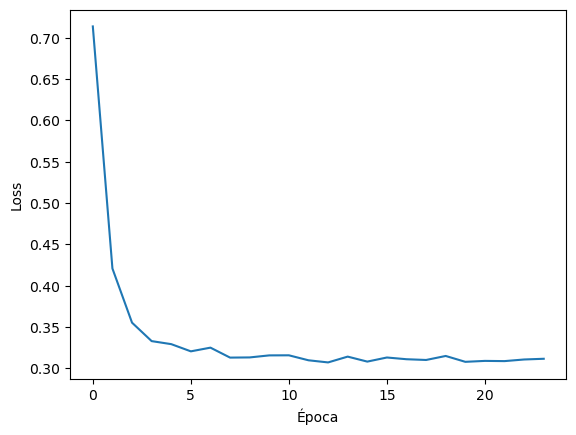

In [12]:
plt.plot(modelo.loss_curve_)
plt.xlabel('Época')
plt.ylabel('Loss')

In [13]:
print('Dados de treinamento')

predicao = modelo.predict(X_train)

print(confusion_matrix(y_train,predicao))
print(classification_report(y_train,predicao))

Dados de treinamento
[[7013 1599]
 [ 540 8099]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      8612
           1       0.84      0.94      0.88      8639

    accuracy                           0.88     17251
   macro avg       0.88      0.88      0.88     17251
weighted avg       0.88      0.88      0.88     17251



In [14]:
print('Dados de teste')

predicao = modelo.predict(X_test)

print(confusion_matrix(y_test,predicao))
print(classification_report(y_test,predicao))

Dados de teste
[[1758  412]
 [ 137 2006]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      2170
           1       0.83      0.94      0.88      2143

    accuracy                           0.87      4313
   macro avg       0.88      0.87      0.87      4313
weighted avg       0.88      0.87      0.87      4313



# Novo Teste

In [15]:
inicio = time.time()  # Tempo inicial

In [16]:
modelo = MLPClassifier(
    hidden_layer_sizes=(24, 12, 6),  # 24 neurônios na primeira, 12 na segunda camada oculta, 6 na terceira camada oculta
    activation='relu',
    solver='adam',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=500,
    shuffle=True,
    random_state=20,
    validation_fraction=0.2,
    verbose=True)

In [17]:
modelo.fit(X_train, y_train)

Iteration 1, loss = 1.15847275
Iteration 2, loss = 0.48649694
Iteration 3, loss = 0.42301104
Iteration 4, loss = 0.39299639
Iteration 5, loss = 0.37117826
Iteration 6, loss = 0.35670852
Iteration 7, loss = 0.34639913
Iteration 8, loss = 0.33460798
Iteration 9, loss = 0.32838294
Iteration 10, loss = 0.32203482
Iteration 11, loss = 0.31727827
Iteration 12, loss = 0.31186684
Iteration 13, loss = 0.31013496
Iteration 14, loss = 0.31495491
Iteration 15, loss = 0.31447160
Iteration 16, loss = 0.30538467
Iteration 17, loss = 0.30719878
Iteration 18, loss = 0.31008326
Iteration 19, loss = 0.30660376
Iteration 20, loss = 0.30588558
Iteration 21, loss = 0.30227953
Iteration 22, loss = 0.29894278
Iteration 23, loss = 0.29831053
Iteration 24, loss = 0.30681868
Iteration 25, loss = 0.30667379
Iteration 26, loss = 0.29620226
Iteration 27, loss = 0.30047113
Iteration 28, loss = 0.29986782
Iteration 29, loss = 0.30438534
Iteration 30, loss = 0.30038467
Iteration 31, loss = 0.29852715
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(24, 12, 6), max_iter=500, random_state=20,
              validation_fraction=0.2, verbose=True)

In [18]:
fim = time.time()  # Tempo final
tempo_execucao = fim - inicio

print(f"Tempo de execução: {tempo_execucao} segundos")

Tempo de execução: 4.066044569015503 segundos


Text(0, 0.5, 'Loss')

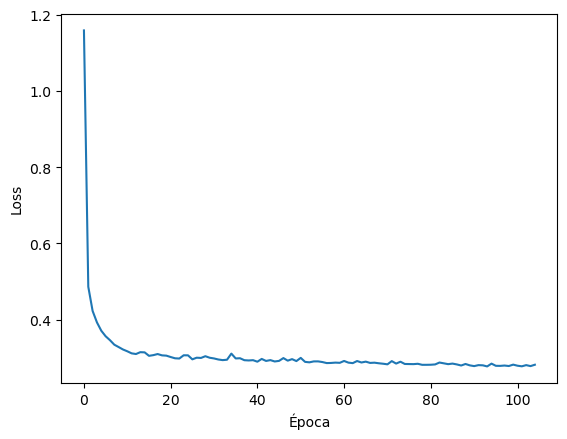

In [19]:
plt.plot(modelo.loss_curve_)
plt.xlabel('Época')
plt.ylabel('Loss')

In [20]:
print('Dados de treinamento')

predicao = modelo.predict(X_train)

print(confusion_matrix(y_train,predicao))
print(classification_report(y_train,predicao))

Dados de treinamento
[[7506 1106]
 [ 864 7775]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      8612
           1       0.88      0.90      0.89      8639

    accuracy                           0.89     17251
   macro avg       0.89      0.89      0.89     17251
weighted avg       0.89      0.89      0.89     17251



In [21]:
print('Dados de teste')

predicao = modelo.predict(X_test)

print(confusion_matrix(y_test,predicao))
print(classification_report(y_test,predicao))

Dados de teste
[[1866  304]
 [ 240 1903]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      2170
           1       0.86      0.89      0.87      2143

    accuracy                           0.87      4313
   macro avg       0.87      0.87      0.87      4313
weighted avg       0.87      0.87      0.87      4313

